## Libraries

In [2]:
import sys
sys.path.append('../')

In [3]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt

## Objetive

The objective of this notebook is twofold:

> Create a heatmap that we will use to introduce it to our API as an endpoint

> Create some graphs that summarize the data that is in the API

## Loading the data

In [4]:
df = pd.read_csv("../Output/Species_def.csv", sep = ";")
cli = pd.read_csv("../Output/data_cli.csv", sep = ";")

In [5]:
df.head()

,long,lat,locality,province,community,year,month,kingdom,class,family,genus,species,common_name
0,-1.856,37.237,Almeria,Almeria,Andalucia,2012,Oct,Animalia,Reptilia,Colubridae,Hemorrhois,Hemorrhois hippocrepis,Horseshoe Whip Snake
1,-2.256,36.797,Almeria,Almeria,Andalucia,2013,Apr,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
2,-2.294,36.835,Almeria,Almeria,Andalucia,2017,Oct,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
3,-2.286,36.820,Almeria,Almeria,Andalucia,2017,Oct,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon
4,-2.224,36.763,Almeria,Almeria,Andalucia,2017,Aug,Animalia,Reptilia,Chamaeleonidae,Chamaeleo,Chamaeleo chamaeleon,Common Chameleon


## Create a HeatMap

In [6]:
#coordenadas de Puerta del Sol
inicial_lat = 40.4146500
initial_long = -3.7004000

In [7]:
map_1 = folium.Map(location = [inicial_lat, initial_long], tiles='Stamen Terrain',  zoom_start = 6)
map_1

In [8]:
df_2001 = df[(df.year == 2010)]

In [9]:
df["class"].unique()

array(['Reptilia', 'Aves', 'Mammalia', 'Amphibia', 'Actinopterygii'],
      dtype=object)

In [10]:
for i,row in df_2001.iterrows():
    #popup distrito
    province = {
    "location" : [row["lat"],row["long"]],
    "tooltip" : row["locality"]
    }
    if row["class"] == "Aves":
        icon = Icon(color = "green",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    elif row["class"] == "Amphibia":
        icon = Icon(color = "blue",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    elif row["class"] == "Reptilia":
        icon = Icon(color = "red",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
                    
    else: 
        icon = Icon(color = "orange",
        prefix = "fa",
        icon = "glass",
        icon_color = "black"
        )
    Marker(**province, icon = icon).add_to(map_1)

In [11]:
map_1

In [12]:
map_2 = folium.Map(location = [inicial_lat, initial_long], tiles='CartoDB dark_matter',  zoom_start = 6)

In [13]:
map_2

In [14]:
#PARA REPTILES
reptiles = df[df["class"]== "Reptilia"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
reptiles_group = folium.FeatureGroup(name = "Reptilia")
#Añadimos el mapa de calor al group
HeatMap(data=reptiles[["lat","long"]],radius=15).add_to(reptiles_group)
reptiles_group.add_to(map_2)

In [15]:
#PARA AVES
aves = df[df["class"]== "Aves"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
aves_group = folium.FeatureGroup(name = "Aves")
#Añadimos el mapa de calor al group
HeatMap(data=aves[["lat","long"]],radius=15).add_to(aves_group)
aves_group.add_to(map_2)

In [16]:
#PARA MAMIFEROS
mam = df[df["class"]== "Mammals"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
mammals_group = folium.FeatureGroup(name = "Mammals")
#Añadimos el mapa de calor al group
HeatMap(data=mam[["lat","long"]],radius=15).add_to(mammals_group)
mammals_group.add_to(map_2)

In [17]:
#PARA AMFIBIOS
amph = df[df["class"]== "Amphibia"]
#creamos Feature Group (mirad la doc) nombramos "mañana"
amp_group = folium.FeatureGroup(name = "Amphibia")
#Añadimos el mapa de calor al group
HeatMap(data=amph[["lat","long"]],radius=15).add_to(amp_group)
amp_group.add_to(map_2)

In [18]:
folium.LayerControl(collapsed=False).add_to(map_2)

In [19]:
map_2

## Creating some Figures

In [ ]:
df['Count'] = df.groupby(['species'])['year'].transform('count')

In [ ]:
df["class"].unique()

In [ ]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]

fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["year"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["year"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["year"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["year"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_class.png")

In [ ]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]



fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["month"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["month"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["month"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["month"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
ax[3].tick_params(axis='x', rotation=90)

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_month.png")

In [ ]:
list1 =  df[df["class"]== "Aves"]
list2 = df[df["class"]== "Mammalia"]
list3 =  df[df["class"]== "Amphibia"]
list4 = df[df["class"]== "Reptilia"]



fig, ax = plt.subplots(1,4, figsize = (15,5))
ax[0].hist(list1["community"], alpha = 1, color = 'seagreen', edgecolor = 'black')
ax[1].hist(list2["month"], alpha = 1, color = 'olivedrab', edgecolor = 'black')
ax[2].hist(list3["month"], alpha = 1, color = 'olive', edgecolor = 'black')
ax[3].hist(list4["month"], alpha = 1, color = 'forestgreen', edgecolor = 'black')

ax[0].title.set_text('Aves')
ax[1].title.set_text('Mammalia')
ax[2].title.set_text('Amphibia')
ax[3].title.set_text('Reptilia')

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
ax[3].tick_params(axis='x', rotation=90)

plt.suptitle('Number of species for each class across years')
plt.show()
fig.savefig("species_month.png")

## Figure climate 

In [4]:
cli = cli.groupby('community', as_index=False)['min_temp', 'max_temp', 'elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp'].mean()

<ipython-input-4-af2c06503d95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cli = cli.groupby('community', as_index=False)['min_temp', 'max_temp', 'elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp'].mean()


In [21]:
cli.head()

,community,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp
0,Algarve,6.831667,29.341667,168.000000,43.000000,16.618333,70.476667,450.486667
1,Andalucia,3.522201,32.681694,469.798442,41.498832,15.922006,60.162025,603.885784
2,Aragon,-0.739964,29.081172,827.101243,39.299112,11.883126,28.455240,646.578153
3,Asturias,2.573077,25.332692,565.346154,40.632692,12.430769,50.832692,489.126923
4,Castilla y Leon,-0.689243,27.802086,932.570801,38.952689,11.116795,35.545774,620.490889


<AxesSubplot:xlabel='community'>

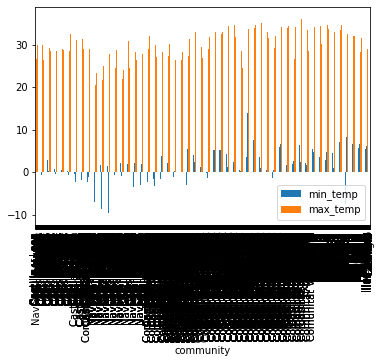

In [24]:
cli.plot(x="community", y=["min_temp", "max_temp"], kind="bar")

In [6]:
df1 = cli.T
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
community,Algarve,Andalucia,Aragon,Asturias,Castilla y Leon,Castilla-La Mancha,Cataluna,Comunidad de Madrid,Comunitat Valenciana,Euskadi,Extremadura,Galicia,Illes Balears,Islas Canarias,La Rioja,Murcia,Navarra - Nafarroa,Norte,Otras,Portugal
min_temp,6.831667,3.522201,-0.739964,2.573077,-0.689243,-0.126208,0.32687,0.270455,1.987302,0.290909,3.056591,2.54375,5.608621,12.18805,-0.854717,2.186614,1.41791,3.096629,4.606355,6.080923
max_temp,29.341667,32.681694,29.081172,25.332692,27.802086,32.375121,27.175069,30.643182,30.616667,25.663636,32.501364,24.8,28.912931,26.059119,26.271698,32.935433,28.247761,25.742135,27.349164,29.894769
elevation,168.0,469.798442,827.101243,565.346154,932.570801,830.71256,642.614958,820.886364,489.436508,696.818182,438.981818,587.45,101.456897,366.540881,906.150943,485.905512,487.343284,484.55618,368.80602,154.470769
isothermality,43.0,41.498832,39.299112,40.632692,38.952689,39.228744,37.685873,37.052273,41.11627,40.490909,39.718864,40.601875,39.147414,48.155346,39.843396,41.646457,38.177612,41.224157,41.272241,43.178769
mean_temp,16.618333,15.922006,11.883126,12.430769,11.116795,13.436353,12.25928,13.006818,14.70754,10.9,15.425227,12.025625,16.196552,18.465409,10.371698,15.711811,12.714925,13.031461,14.490635,16.251077
precip,70.476667,60.162025,28.45524,50.832692,35.545774,39.4843,26.418006,38.130682,36.485317,24.527273,55.407273,47.464375,46.415517,79.138365,26.003774,40.817323,23.585075,53.594944,56.73913,60.013846
seasonal_temp,450.486667,603.885784,646.578153,489.126923,620.490889,701.187077,604.93241,683.940909,610.363492,549.681818,626.537727,480.13375,525.50431,260.986792,588.584906,646.435433,586.655224,480.497191,481.167893,480.531692


In [10]:
df1.columns = df1.iloc[0]

In [14]:
df1 = df1.iloc[1:]

In [15]:
df1

community,Algarve,Andalucia,Aragon,Asturias,Castilla y Leon,Castilla-La Mancha,Cataluna,Comunidad de Madrid,Comunitat Valenciana,Euskadi,Extremadura,Galicia,Illes Balears,Islas Canarias,La Rioja,Murcia,Navarra - Nafarroa,Norte,Otras,Portugal
min_temp,6.831667,3.522201,-0.739964,2.573077,-0.689243,-0.126208,0.32687,0.270455,1.987302,0.290909,3.056591,2.54375,5.608621,12.18805,-0.854717,2.186614,1.41791,3.096629,4.606355,6.080923
max_temp,29.341667,32.681694,29.081172,25.332692,27.802086,32.375121,27.175069,30.643182,30.616667,25.663636,32.501364,24.8,28.912931,26.059119,26.271698,32.935433,28.247761,25.742135,27.349164,29.894769
elevation,168.0,469.798442,827.101243,565.346154,932.570801,830.71256,642.614958,820.886364,489.436508,696.818182,438.981818,587.45,101.456897,366.540881,906.150943,485.905512,487.343284,484.55618,368.80602,154.470769
isothermality,43.0,41.498832,39.299112,40.632692,38.952689,39.228744,37.685873,37.052273,41.11627,40.490909,39.718864,40.601875,39.147414,48.155346,39.843396,41.646457,38.177612,41.224157,41.272241,43.178769
mean_temp,16.618333,15.922006,11.883126,12.430769,11.116795,13.436353,12.25928,13.006818,14.70754,10.9,15.425227,12.025625,16.196552,18.465409,10.371698,15.711811,12.714925,13.031461,14.490635,16.251077
precip,70.476667,60.162025,28.45524,50.832692,35.545774,39.4843,26.418006,38.130682,36.485317,24.527273,55.407273,47.464375,46.415517,79.138365,26.003774,40.817323,23.585075,53.594944,56.73913,60.013846
seasonal_temp,450.486667,603.885784,646.578153,489.126923,620.490889,701.187077,604.93241,683.940909,610.363492,549.681818,626.537727,480.13375,525.50431,260.986792,588.584906,646.435433,586.655224,480.497191,481.167893,480.531692


In [24]:
df1.plot(x="community", y=["Algarve", "Andalucia", "Aragon"], kind="bar")

KeyError: 'community'